##Diferencias Centradas
Método diferencias centradas para aproximación de derivadas

In [1]:
import numpy as np
import pandas as pd
import fractions
import sympy as sp
import math 
from math import *
from math import e
from sympy import *
import matplotlib.pyplot as plt
x= symbols('x')
h= symbols('h')

In [2]:
#Imprime como fraccion
np.set_printoptions(formatter={'all':lambda x: str(fractions.Fraction(x).limit_denominator())})

In [3]:
funcion= (x**4)*e**(-x)-(x**2)*e**(-2*x)

In [4]:
def alpha_centrado(d,p):
  a= d+p-1
  ne= a+1
  m0= int((-1)*a/2)
  m1= int(a/2)
  A= np.zeros((m1-m0+1,m1-m0+1))
  b = np.zeros(m1-m0+1)

  for i in range(m1-m0+1):
    if i+1==d:
      b[i+1]=1
    for indice,j in zip(range(m1-m0+1), range(m0,m1+1)):
      if i == 0:
        A[i,indice]=1
      else:
        A[i,indice]=j**(i)
  a= np.linalg.solve(A,b)
  return a

In [5]:
def aprox_centrado(fx,d,p,xi,j):
  #Calculamos derivada
  g=diff(fx,x,d)
  g=g.subs(x,xi)

  #Calculamos la aproximacion de la derivada
  a= d+p-1
  ne= a+1
  m0= int((-1)*a/2)
  m1= int(a/2)
  alpha= alpha_centrado(d,p)
  faprox=0
  for indice,i in zip(range(ne),range(m0,m1+1)):
    faprox+= ((alpha[indice]*(fx.subs(x,x+i*h)))*math.factorial(d))/h**d
  hi=2**(-j)
  faprox= faprox.subs(x,xi).subs(h,hi)
  E= abs(g-faprox)
  #print('derivada',d,':',g,'aproximacion:',faprox,'con precisión',p,'error:',E)
  return g,faprox,E

In [6]:
datos_centrado= []
derivada,aprox,error= aprox_centrado(funcion,4,2,-1,1)
datos_centrado.append([1,2**(-1),derivada,aprox,error])
hViejo= 2**(-1)

for i in range(2,16):
  derivada,aprox,errorN= aprox_centrado(funcion,4,2,-1,i)
  hNuevo= 2**(-i)
  alpha= log(errorN/error)/log(hNuevo/hViejo)
  datos_centrado.append([i, 2**(-i), derivada, aprox, errorN, alpha])
  error, hViejo= errorN,hNuevo
  
datos_centrado = pd.DataFrame(datos_centrado).set_axis(['j','h','ValorF', 'ApproxF', 'Error', 'Alpha'], axis=1)
datos_centrado

,j,h,ValorF,ApproxF,Error,Alpha
0,1,0.500000,-377.678278515183,-573.929888438223,196.251609923040,None
1,2,0.250000,-377.678278515183,-421.222166129355,43.5438876141725,2.17216236627424
2,3,0.125000,-377.678278515183,-388.242877241428,10.5645987262451,2.04323224699715
3,4,0.062500,-377.678278515183,-380.299694821704,2.62141630652150,2.01081957957703
4,5,0.031250,-377.678278515183,-378.332404706627,0.654126191444448,2.00270559920741
5,6,0.015625,-377.678278515183,-377.841733336449,0.163454821265987,2.00067705012058
6,7,0.007812,-377.678278515183,-377.719137191772,0.0408586765897780,2.00017755035864
7,8,0.003906,-377.678278515183,-377.688507080078,0.0102285648954421,1.99803873205473
8,9,0.001953,-377.678278515183,-377.680664062500,0.00238554731731710,2.10021153639609
9,10,0.000977,-377.678278515183,-377.679687500000,0.00140898481731710,0.759664236653826


In [7]:
datos_c= []
derivada,aprox,error= aprox_centrado(funcion,4,4,-1,1)
datos_c.append([1,2**(-1),derivada,aprox,error])
hViejo= 2**(-1)

for i in range(2,16):
  derivada,aprox,errorN= aprox_centrado(funcion,4,4,-1,i)
  hNuevo= 2**(-i)
  alpha= log(errorN/error)/log(hNuevo/hViejo)
  datos_c.append([i, 2**(-i), derivada, aprox, errorN, alpha])
  error, hViejo= errorN,hNuevo
  
datos_c = pd.DataFrame(datos_c).set_axis(['j','h','ValorF', 'ApproxF', 'Error', 'Alpha'], axis=1)
datos_c

,j,h,ValorF,ApproxF,Error,Alpha
0,1,0.500000,-377.678278515183,-297.816760219927,79.8615182952554,None
1,2,0.250000,-377.678278515183,-373.523483686350,4.15479482883256,4.26465135915598
2,3,0.125000,-377.678278515183,-377.430347914327,0.247930600855398,4.06676898361982
3,4,0.062500,-377.678278515183,-377.662961518392,0.0153169967907161,4.01673098682457
4,5,0.031250,-377.678278515183,-377.677323963493,0.000954551689574146,4.00416632242141
5,6,0.015625,-377.678278515183,-377.678218364716,6.01504671067232e-5,3.98817547658381
6,7,0.007812,-377.678278515183,-377.678270339966,8.17521686258260e-6,2.87924703453546
7,8,0.003906,-377.678278515183,-377.678207397461,7.11177217453951e-5,-3.12088020184888
8,9,0.001953,-377.678278515183,-377.677001953125,0.00127656205768290,-4.16591075494747
9,10,0.000977,-377.678278515183,-377.667968750000,0.0103097651826829,-3.01367589547298


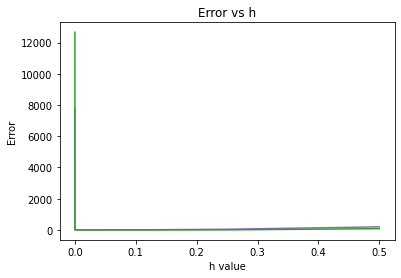

In [8]:
fig, ax = plt.subplots()
ax.plot(datos_centrado["h"],datos_centrado["Error"], color = 'tab:purple')
ax.plot(datos_c["h"],datos_c["Error"], color = 'tab:green')
plt.title("Error vs h")
plt.xlabel("h value")
plt.ylabel("Error")
plt.show()

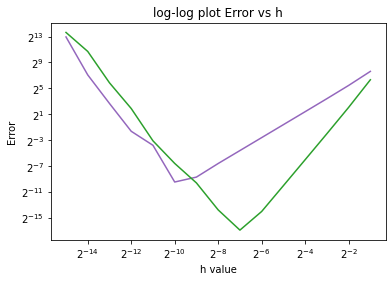

In [9]:
plt.loglog(datos_centrado["h"], datos_centrado["Error"], basex = 2, basey = 2,color = 'tab:purple')
plt.loglog(datos_c["h"], datos_c["Error"], basex = 2, basey = 2,color = 'tab:green')
plt.title("log-log plot Error vs h")
plt.xlabel("h value")
plt.ylabel("Error")
plt.show()